# 4. MLP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

import numpy as np
import pandas as pd

from sklearn import svm, metrics
from sklearn.model_selection import StratifiedKFold, cross_validate

Using TensorFlow backend.
/home/miguel/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Open the dataset

In [2]:
BASE_DIR = '..'
DATA_DIR = f'{BASE_DIR}/data'

In [3]:
sample_df = pd.read_csv(f'{DATA_DIR}/sample.csv')

In [4]:
sample_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [5]:
y = sample_df.pop('target').astype(int).values
X = sample_df.values

## Fit a simple CNN

In [6]:
n_folds = 10

In [7]:
def prepare_data(X, y, reshape=True):
    if reshape:
        X = X.reshape(-1, 28, 28, 1)
    y = to_categorical(y, num_classes=10)
    
    return X, y

In [8]:
def train_evaluate(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=128, reshape=True):
    X_train, y_train = prepare_data(X_train, y_train, reshape)
    X_test, y_test = prepare_data(X_test, y_test, reshape)
    
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    return model.evaluate(X_test, y_test)

In [9]:
def load_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))
    
    optmin = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optmin, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    
    return model

In [10]:
kFold = StratifiedKFold(n_splits=n_folds)

In [11]:
scores = []

In [12]:
for i, (train, test) in enumerate(kFold.split(X, y)):
    print(f'Running fold {i}...')
    model = load_model()
    loss, acc = train_evaluate(model, X[train], y[train], X[test], y[test], reshape=False)
    scores.append(acc)
    
scores = np.array(scores)

Running fold 0...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
447/447 [==============================] - 0s - loss: 0.3040 - acc: 0.9004     
Epoch 2/10
447/447 [=======

Epoch 1/10
449/449 [==============================] - 0s - loss: 0.3006 - acc: 0.9011     
Epoch 2/10
449/449 [==============================] - 0s - loss: 0.2033 - acc: 0.9156     
Epoch 3/10
449/449 [==============================] - 0s - loss: 0.1249 - acc: 0.9539     
Epoch 4/10
449/449 [==============================] - 0s - loss: 0.0802 - acc: 0.9735     
Epoch 5/10
449/449 [==============================] - 0s - loss: 0.0592 - acc: 0.9788     
Epoch 6/10
449/449 [==============================] - 0s - loss: 0.0404 - acc: 0.9886     
Epoch 7/10
449/449 [==============================] - 0s - loss: 0.0314 - acc: 0.9906     
Epoch 8/10
449/449 [==============================] - 0s - loss: 0.0254 - acc: 0.9915     
Epoch 9/10
449/449 [==============================] - 0s - loss: 0.0182 - acc: 0.9942     
Epoch 10/10
32/51 [=================>............] - ETA: 0sRunning fold 5...
_________________________________________________________________
Layer (type)                 Output S

452/452 [==============================] - 0s - loss: 0.0793 - acc: 0.9735     
Epoch 5/10
452/452 [==============================] - 0s - loss: 0.0537 - acc: 0.9825     
Epoch 6/10
452/452 [==============================] - 0s - loss: 0.0405 - acc: 0.9861     
Epoch 7/10
452/452 [==============================] - 0s - loss: 0.0290 - acc: 0.9918     
Epoch 8/10
452/452 [==============================] - 0s - loss: 0.0269 - acc: 0.9918     
Epoch 9/10
452/452 [==============================] - 0s - loss: 0.0189 - acc: 0.9940     
Epoch 10/10
32/48 [===================>..........] - ETA: 0sRunning fold 9...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________

In [13]:
print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Accuracy: 0.9780 (+/- 0.0102)


## Data Augmentation

In [14]:
def augment_fold(X, y, aug_factor=5):
    from keras.preprocessing.image import ImageDataGenerator
    
    image_generator = ImageDataGenerator(width_shift_range=0.1)
    
    image_generator.fit(X.reshape(-1, 28, 28, 1), augment=True)
    
    np_iter = image_generator.flow(X.reshape(-1, 28, 28, 1), y, batch_size=500)
    
    X_aug_lst = [X]
    y_aug_lst = [y]
    
    for i in range(aug_factor):
        X_temp, y_temp = np_iter.next()
        X_temp = X_temp.reshape(len(X_temp), -1)
        X_aug_lst.append(X_temp)
        y_aug_lst.append(y_temp)
        
    X_aug = np.vstack(X_aug_lst)
    y_aug = np.concatenate(y_aug_lst)
    
    assert X_aug.shape[0] == y_aug.shape[0], f"X_aug and y_aug shapes mismatch {X_aug.shape[0]} - {y_aug.shape[0]}"
    
    X_aug = np.vstack(X_aug_lst)
    y_aug = np.concatenate(y_aug_lst)
    
    return X_aug, y_aug

In [15]:
n_folds = 10

In [16]:
kFold = StratifiedKFold(n_splits=n_folds)

In [17]:
results = {}

In [18]:
X_a, y_a = augment_fold(X, y, aug_factor=4)

In [19]:
scores = []

for i, (train, test) in enumerate(kFold.split(X_a, y_a)):
    print(f'Running fold {i}...')
    model = load_model()
    loss, acc = train_evaluate(model, X_a[train], y_a[train], X_a[test], y_a[test], reshape=False)
    scores.append(acc)
    
scores = np.array(scores)

Running fold 0...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2247/2247 [==============================] - 0s - loss: 0.2065 - acc: 0.9246     
Epoch 2/10
2247/2247 [===

Epoch 1/10
2247/2247 [==============================] - 0s - loss: 0.2102 - acc: 0.9241     
Epoch 2/10
2247/2247 [==============================] - 0s - loss: 0.0841 - acc: 0.9692     
Epoch 3/10
2247/2247 [==============================] - 0s - loss: 0.0481 - acc: 0.9839     
Epoch 4/10
2247/2247 [==============================] - 0s - loss: 0.0309 - acc: 0.9905     
Epoch 5/10
2247/2247 [==============================] - 0s - loss: 0.0212 - acc: 0.9931     
Epoch 6/10
2247/2247 [==============================] - 0s - loss: 0.0128 - acc: 0.9973     
Epoch 7/10
2247/2247 [==============================] - 0s - loss: 0.0098 - acc: 0.9974     
Epoch 8/10
2247/2247 [==============================] - 0s - loss: 0.0065 - acc: 0.9988     
Epoch 9/10
2247/2247 [==============================] - 0s - loss: 0.0055 - acc: 0.9987     
Epoch 10/10
 32/253 [==>...........................] - ETA: 1sRunning fold 5...
_________________________________________________________________
Layer (type)     

2253/2253 [==============================] - 0s - loss: 0.0548 - acc: 0.9807     
Epoch 4/10
2253/2253 [==============================] - 0s - loss: 0.0358 - acc: 0.9885     
Epoch 5/10
2253/2253 [==============================] - 0s - loss: 0.0209 - acc: 0.9937     
Epoch 6/10
2253/2253 [==============================] - 0s - loss: 0.0141 - acc: 0.9964     
Epoch 7/10
2253/2253 [==============================] - 0s - loss: 0.0115 - acc: 0.9972     
Epoch 8/10
2253/2253 [==============================] - 0s - loss: 0.0068 - acc: 0.9988     
Epoch 9/10
2253/2253 [==============================] - 0s - loss: 0.0056 - acc: 0.9986     
Epoch 10/10
 32/247 [==>...........................] - ETA: 2sRunning fold 9...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_39 (Drop

In [20]:
print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Accuracy: 0.9950 (+/- 0.0025)


## Train

In [21]:
model = load_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_42 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [22]:
X_a_reshaped, y_a_cat = prepare_data(X_a, y_a, reshape=False)

In [23]:
earlystopper = EarlyStopping(
    patience=5,
    verbose=1,
    monitor="acc",
    mode='max'
)
checkpointer = ModelCheckpoint(
    'cnn_v1.h5',
    monitor="val_acc",
    verbose=1,
    mode='max',
    save_best_only=True
)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.5, patience=5, min_lr=0.00001,
                          verbose=1)

In [24]:
model.fit(X_a_reshaped, y_a_cat, epochs=20, batch_size=256, callbacks=[reduce_lr, earlystopper, checkpointer])

Epoch 1/20
2500/2500 [==============================] - 1s - loss: 0.2408 - acc: 0.9125     
Epoch 2/20
1280/2500 [==============>...............] - ETA: 0s - loss: 0.1240 - acc: 0.9544

/home/miguel/.ve/mnist-api-4asb866O/lib/python3.6/site-packages/keras/callbacks.py:889: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/miguel/.ve/mnist-api-4asb866O/lib/python3.6/site-packages/keras/callbacks.py:405: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


2500/2500 [==============================] - 0s - loss: 0.1106 - acc: 0.9601     
Epoch 3/20
2500/2500 [==============================] - 0s - loss: 0.0687 - acc: 0.9764     
Epoch 4/20
2500/2500 [==============================] - 0s - loss: 0.0467 - acc: 0.9841     
Epoch 5/20
2500/2500 [==============================] - 0s - loss: 0.0335 - acc: 0.9896     
Epoch 6/20
2500/2500 [==============================] - 0s - loss: 0.0232 - acc: 0.9933     
Epoch 7/20
2500/2500 [==============================] - 0s - loss: 0.0168 - acc: 0.9956     
Epoch 8/20
2500/2500 [==============================] - 0s - loss: 0.0126 - acc: 0.9964     
Epoch 9/20
2500/2500 [==============================] - 0s - loss: 0.0104 - acc: 0.9972     
Epoch 10/20
2500/2500 [==============================] - 0s - loss: 0.0067 - acc: 0.9988     
Epoch 11/20
2500/2500 [==============================] - 0s - loss: 0.0053 - acc: 0.9989     
Epoch 12/20
2500/2500 [==============================] - 0s - loss: 0.0041 - ac

In [27]:
model.save('../data/weights/mlp_v1.h5')

In [28]:
from keras.models import load_model as load
m = load('../data/weights/mlp_v1.h5')

In [29]:
X_a_reshaped[0].shape

(784,)

In [30]:
m.predict_classes(X_a_reshaped[:1]).tolist()

1/1 [==============================] - 0s


[8]

In [31]:
image_b64 = ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'
                     'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'
                     'AAAAAAAAAAAAAAADEhISfoivGqb/938AAAAAAAAAAAAAAAAeJF6aqv39/f394az98sNAAAAAAAAAAAAAAAAx7v39/f39/f3'
                     '9+11SUjgnAAAAAAAAAAAAAAAAEtv9/f39/ca29/EAAAAAAAAAAAAAAAAAAAAAAABQnGv9/c0LACuaAAAAAAAAAAAAAAAAAA'
                     'AAAAAAAA4Bmv1aAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIv9vgIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALvv1GAAAAA'
                     'AAAAAAAAAAAAAAAAAAAAAAAAAAAACPx4aBsAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUfD9/XcZAAAAAAAAAAAAAAAAAAAA'
                     'AAAAAAAAAAAtuv39lhsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBd/P27AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPn9+UA'
                     'AAAAAAAAAAAAAAAAAAAAAAAAAAAAugrf9/c8CAAAAAAAAAAAAAAAAAAAAAAAAACeU5f39/fq2AAAAAAAAAAAAAAAAAAAAAA'
                     'AAGHLd/f39/clOAAAAAAAAAAAAAAAAAAAAAAAXQtX9/f39xlECAAAAAAAAAAAAAAAAAAAAABKr2/39/f3DUAkAAAAAAAAAA'
                     'AAAAAAAAAAAN6zi/f39/fSFCwAAAAAAAAAAAAAAAAAAAAAAAIj9/f3Uh4QQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'
                     'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'
                     'AAA==')

In [32]:
def _b64_to_image(image_b64):
    import base64
    r = base64.decodebytes(image_b64.encode())
    image = np.frombuffer(r, np.uint8)
    return image

In [33]:
s = _b64_to_image(image_b64)

In [34]:
m.predict_classes(s.reshape(-1, 28*28))

1/1 [==============================] - 0s


array([5])

In [35]:
s.shape

(784,)

In [36]:
s.reshape(28, 28).shape

(28, 28)

In [37]:
%matplotlib inline 

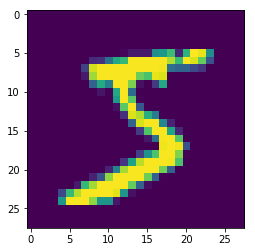

In [38]:
from matplotlib import pyplot as plt
plt.imshow(s.reshape(28, 28), interpolation='nearest')
plt.show()